# **🔎 CIFAR-10 Image Classification Using CNN**

## **I. Introduction**

### **i. Context**
The **CIFAR-10 dataset** (Canadian Institute for Advanced Research) is a widely used benchmark in computer vision, consisting of **60,000 color images** categorized into **10 distinct classes**: airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each image has a resolution of **32×32×3 pixels**, making the dataset relatively small and efficient for experimentation. Because of its manageable size and balanced class distribution, CIFAR-10 serves as an excellent platform for testing and comparing machine learning algorithms, particularly **convolutional neural networks (CNNs)**, which have proven highly effective in visual object recognition tasks.

### **ii. Objective**
In this case study, we will build a **multi-class image classification model** to predict **10 object categories** from the **CIFAR-10 dataset** using **Convolutional Neural Networks (CNNs)** and **Transfer Learning**. This approach combines the powerful feature extraction capabilities of pre-trained deep learning models with fine-tuning techniques to improve accuracy and training efficiency on small image datasets.

### **iii. Dataset**
The CIFAR-10 dataset consists of 60000 32x32x3, i.e., color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. You can learn more about this dataset here - https://www.cs.toronto.edu/~kriz/cifar.html

## **II. Preparation**

### **i. Libraries**

In [1]:
# CIFAR-10 dataset (directly from Keras)
from keras.datasets import cifar10
# Data visualization
import matplotlib.pyplot as plt
# Numerical data operation
import numpy as np
# Deep learning frame work
import tensorflow as tf

2025-11-11 22:23:34.771240: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### **ii. CIFAR Dataset**

#### **1. Data Retrieval**

In [2]:
# Import the dataset.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**Warning**

In case the earlier cell throws an error, please uncomment the cell below. Run it once. It will show an error. Restart the run time and then run it again.

Please note: It will definitely show an error the first time you run it and restarting the runtime is compulsory. The conversion of the tensors to numpy array in this cell may take too long to execute.

In [3]:
#!pip install hub
#import hub

#train = hub.load('hub://activeloop/cifar10-train')
#test = hub.load('hub://activeloop/cifar10-test')
#x_train_tensor = train.images
#y_train = train.labels
#x_test = test.images
#y_test = test.labels

#x_train = np.array(x_train)
#x_test = np.array(x_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)

In [4]:
# Checking the shape of the dataset
x_train.shape

(50000, 32, 32, 3)

**🔬 Observations**

The data is stored in a **4-dimensional NumPy array**. The first dimension **50000** is denoting **the number of images in the training data**, and each image is stacked on top of the other as a 3-dimensional NumPy array. The second dimension **32** is denoting **the number of pixels along the x-axis**, **the third dimension 32 is denoting the number of pixels along the y-axis**, and **the fourth dimension 3 is the total number of channels in those images**, i.e., these are colored images consisting of RGB (Red, Green, and Blue) channels.

#### **2. Data Demonstration**

Below is the 3-dimensional NumPy representation of the first image in the training data. **Each pixel in the image has 3 values - the intensity of R, G, and B channels**, and the size of each image is 32x32. So, each image is represented by 32 arrays of shape 32x3.

In [5]:
# Retrieve the first image variables from the training data.
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
# Retrieve the first image labels from the training data.
y_train[0]

array([6], dtype=uint8)

The target labels are encoded in numerical format. Here, encoding 6 denotes the category frog. **We will create a list of category names to convert the number to its original category name.**

In [7]:
# Check the shape of the test data.
x_test.shape

(10000, 32, 32, 3)

**🔬 Observations**

There are **10,000 images in the test data**.

#### **3. Data Format Conversion (NumPy Arrays to Images) and Visualization of Random Samples**

In [8]:
# Declare the number of classes.
num_classes = 10
# Create a list of category names in alphabetical order.
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

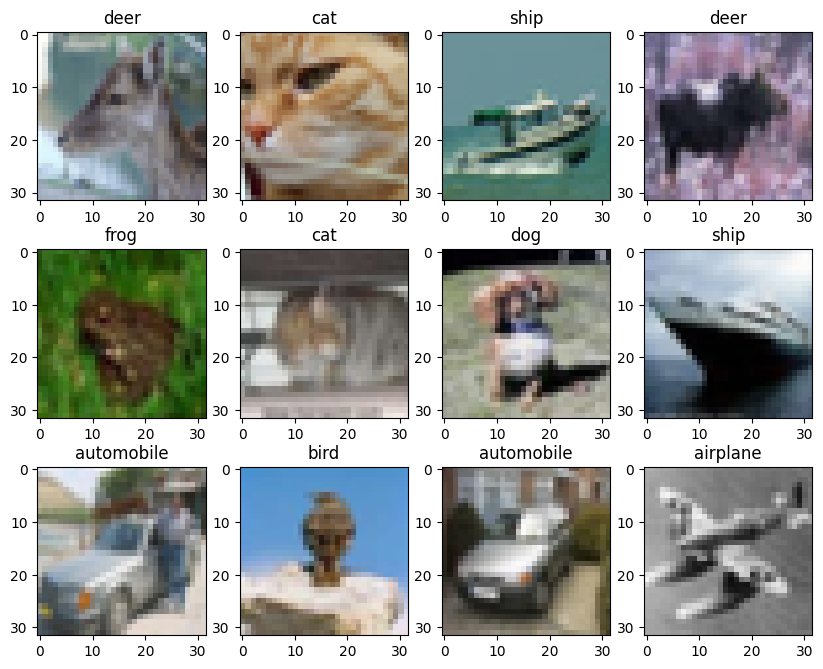

In [9]:
# Declare the number of rows.
rows = 3
# Declare the number of columns.
cols = 4
# Set the figure.
fig = plt.figure(figsize = (10, 8))
# Iterate each column.
for i in range(cols):
    # Iterate each row.
    for j in range(rows):
        # Randomly choose an image index.
        random_index = np.random.randint(0, len(y_train))
        # Add a subplot at the current grid position.
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        # Display the selected image.
        ax.imshow(x_train[random_index, :])
        # Set the subplot title to the image's class label
        ax.set_title(cifar10_classes[y_train[random_index, 0]])

# Display all subplots.
plt.show()

#### **4. Data Normalization and Hotcoding**

In [10]:
# Normalize the image pixels.
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [11]:
# Encode training and test set label using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

## **III. Modelling**

### **i. Libraries**

In [12]:
# Random number generator
import random
# Sequential model class from Keras
from tensorflow.keras.models import Sequential
# Common neural network layers from Keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
# Keras backend module
from tensorflow.keras import backend

### **ii. Model 1**

#### **1. Architecture**

In [13]:
# Set a fixed seed value.
seed = 42
# Set the seed for Python's built-in random module. Ensure any random operations to behave the same each run.
random.seed(seed)
# Set the seed for NumPy's random number generator. Control randomness in NumPy operations.
np.random.seed(seed)
# Set the seed for TensorFlow's random number generator. Make TensorFlow operations reproducible.
tf.random.set_seed(seed)

In [14]:
# Initialize a model.
model_1 = Sequential()
# ----- Layer 1 -----
# Add the first conv layer. The input_shape denotes input dimension of CIFAR images
model_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))
# Add LeakyRelu activation function.
model_1.add(LeakyReLU(0.1))
# ----- Layer 2 -----
# Add the second conv layer.
model_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
# Add LeakyRelu activation function.
model_1.add(LeakyReLU(0.1))
# Add the max pooling to reduce the size of output of this conv layer.
model_1.add(MaxPooling2D(pool_size = (2, 2)))
# ----- Output -----
# Flatten the output of the conv layer.
model_1.add(Flatten())
# Add a fully connected dense layer with 100 neurons.
model_1.add(Dense(256))
# Add LeakyRelu activation function.
model_1.add(LeakyReLU(0.1))
# Add the output layer.
model_1.add(Dense(10, activation = 'softmax'))
# Generate the summary of the model.
model_1.summary()

/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,105,066 (8.03 MB)

 Trainable params: 2,105,066 (8.03 MB)

 Non-trainable params: 0 (0.00 B)

**🔬 Observations**

- As we can see from the above summary, this CNN model will train and learn **2,105,066 parameters (weights and biases).**

#### **2. Training**

In [15]:
# Compile the model to configure its learning process.
model_1.compile(
    loss='categorical_crossentropy', # Specify the loss function. 'categorical_crossentropy' is used for multi-class classification problems.
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005), # Define the optimizer.
    metrics=['accuracy'] # Specify the metrics to monitor during training and evaluation. 'accuracy' will track how often predictions match the true labels.
)

In [16]:
# Train the model.
history_1 = model_1.fit(
    x_train_normalized, y_train_encoded, 
    epochs = 10, 
    validation_split = 0.1, 
    shuffle = True, 
    verbose = 2
)

Epoch 1/10
1407/1407 - 85s - 60ms/step - accuracy: 0.5309 - loss: 1.3182 - val_accuracy: 0.6358 - val_loss: 1.0312
Epoch 2/10
1407/1407 - 78s - 55ms/step - accuracy: 0.6817 - loss: 0.9107 - val_accuracy: 0.6586 - val_loss: 0.9646
Epoch 3/10
1407/1407 - 77s - 55ms/step - accuracy: 0.7657 - loss: 0.6719 - val_accuracy: 0.6760 - val_loss: 1.0149
Epoch 4/10
1407/1407 - 77s - 54ms/step - accuracy: 0.8440 - loss: 0.4593 - val_accuracy: 0.6704 - val_loss: 1.2512
Epoch 5/10
1407/1407 - 78s - 55ms/step - accuracy: 0.9006 - loss: 0.2917 - val_accuracy: 0.6558 - val_loss: 1.6129
Epoch 6/10
1407/1407 - 78s - 55ms/step - accuracy: 0.9347 - loss: 0.1898 - val_accuracy: 0.6658 - val_loss: 1.7604
Epoch 7/10
1407/1407 - 78s - 55ms/step - accuracy: 0.9592 - loss: 0.1195 - val_accuracy: 0.6788 - val_loss: 2.0330
Epoch 8/10
1407/1407 - 77s - 55ms/step - accuracy: 0.9715 - loss: 0.0842 - val_accuracy: 0.6776 - val_loss: 2.1302
Epoch 9/10
1407/1407 - 77s - 55ms/step - accuracy: 0.9773 - loss: 0.0666 - val_a

#### **3. Evaluation**

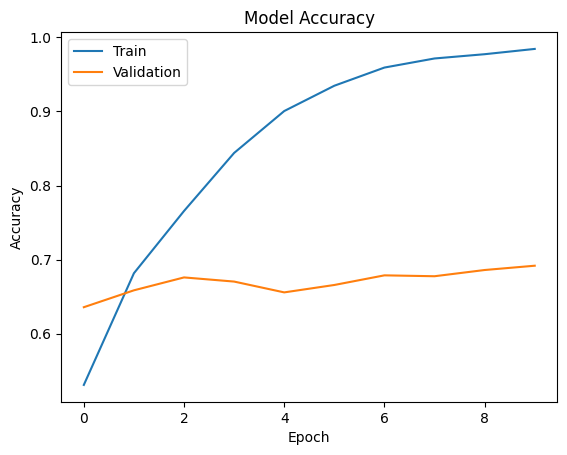

In [17]:
# Plot training accuracy.
plt.plot(history_1.history['accuracy'])
# Plot validation accuracy.
plt.plot(history_1.history['val_accuracy'])
# Set plot title.
plt.title('Model Accuracy')
# Set y label.
plt.ylabel('Accuracy')
# Set x label.
plt.xlabel('Epoch')
# Set legend.
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Show the plot.
plt.show()

**🔬 Observations:**

- We can see from the above plot that the model has done poorly on the validation data. The model is highly overfitting the training data.
- The validation accuracy has become more or less constant after 2 epochs.

### **iii. Model 2**

#### **1. Architecture**

In [18]:
# Clear the backend.
backend.clear_session()

In [19]:
# Set the seed for Python's built-in random module. Ensure any random operations to behave the same each run.
random.seed(seed)
# Set the seed for NumPy's random number generator. Control randomness in NumPy operations.
np.random.seed(seed)
# Set the seed for TensorFlow's random number generator. Make TensorFlow operations reproducible.
tf.random.set_seed(seed)

In [20]:
# Initialize a model.
model_2 = Sequential()
# ----- Layer 1 -----
# Add the first conv layer.
model_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))
# Add LeakyRelu activation function.
model_2.add(LeakyReLU(0.1))
# Add dropout to randomly switch off 25% neurons to reduce overfitting.
model_2.add(Dropout(0.2))
# ----- Layer 2 -----
# Add the second conv layer.
model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
# Add LeakyRelu activation function.
model_2.add(LeakyReLU(0.1))
# Add dropout to randomly switch off 20% neurons to reduce overfitting.
model_2.add(Dropout(0.2))
# Add the max pooling to reduce the size of output of this conv layer.
model_2.add(MaxPooling2D(pool_size = (2, 2)))
# ----- Output -----
# Flatten the output of the conv layer.
model_2.add(Flatten())
# Add the output layer.
model_2.add(Dense(256))
# Add LeakyRelu activation function.
model_2.add(LeakyReLU(0.1))
# Add dropout to randomly switch off 50% neurons to reduce overfitting.
model_2.add(Dropout(0.5))
# Add the output layer.
model_2.add(Dense(10, activation = 'softmax'))
# Generate the summary of the model.
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,105,066 (8.03 MB)

 Trainable params: 2,105,066 (8.03 MB)

 Non-trainable params: 0 (0.00 B)

#### **2. Training**

In [21]:
# Compile the model to configure its learning process.
model_2.compile(
    loss='categorical_crossentropy', # Specify the loss function. 'categorical_crossentropy' is used for multi-class classification problems.
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005), # Define the optimizer.
    metrics=['accuracy'] # Specify the metrics to monitor during training and evaluation. 'accuracy' will track how often predictions match the true labels.
)

In [22]:
# Fit the model.
history_2 = model_2.fit(
    x_train_normalized, y_train_encoded, 
    epochs = 10, 
    validation_split = 0.1, 
    shuffle = True, 
    verbose = 2
)

Epoch 1/10
1407/1407 - 97s - 69ms/step - accuracy: 0.4481 - loss: 1.5363 - val_accuracy: 0.3968 - val_loss: 1.9979
Epoch 2/10
1407/1407 - 97s - 69ms/step - accuracy: 0.5859 - loss: 1.1786 - val_accuracy: 0.5674 - val_loss: 1.2923
Epoch 3/10
1407/1407 - 94s - 67ms/step - accuracy: 0.6433 - loss: 1.0054 - val_accuracy: 0.5832 - val_loss: 1.2664
Epoch 4/10
1407/1407 - 94s - 67ms/step - accuracy: 0.6870 - loss: 0.9015 - val_accuracy: 0.6418 - val_loss: 1.0567
Epoch 5/10
1407/1407 - 95s - 67ms/step - accuracy: 0.7108 - loss: 0.8298 - val_accuracy: 0.6376 - val_loss: 1.1084
Epoch 6/10
1407/1407 - 96s - 68ms/step - accuracy: 0.7337 - loss: 0.7609 - val_accuracy: 0.6290 - val_loss: 1.1718
Epoch 7/10
1407/1407 - 96s - 68ms/step - accuracy: 0.7544 - loss: 0.7041 - val_accuracy: 0.6518 - val_loss: 1.0729
Epoch 8/10
1407/1407 - 95s - 68ms/step - accuracy: 0.7677 - loss: 0.6506 - val_accuracy: 0.6424 - val_loss: 1.1277
Epoch 9/10
1407/1407 - 95s - 68ms/step - accuracy: 0.7833 - loss: 0.6165 - val_a

#### **3. Evaluation**

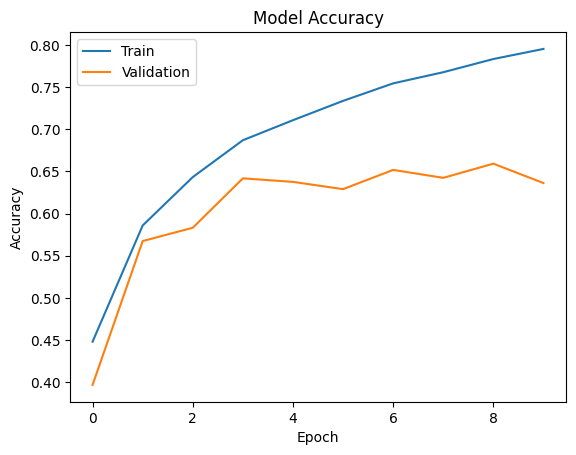

In [23]:
# Plot training accuracy.
plt.plot(history_2.history['accuracy'])
# Plot validation accuracy.
plt.plot(history_2.history['val_accuracy'])
# Set plot title.
plt.title('Model Accuracy')
# Set y label.
plt.ylabel('Accuracy')
# Set x label.
plt.xlabel('Epoch')
# Set legend.
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot.
plt.show()

**🔬 Observations:**

- The second model with dropout layers seems to have reduced the overfitting in comparison to the previous model, but still, the model is not performing well on the validation data.
- The validation accuracy has decreased slightly as compared to the previous model.

### **iv. Model 3**

#### **1. Architecture**

In [24]:
# Clear the backend.
backend.clear_session()

In [25]:
# Set the seed for Python's built-in random module. Ensure any random operations to behave the same each run.
random.seed(seed)
# Set the seed for NumPy's random number generator. Control randomness in NumPy operations.
np.random.seed(seed)
# Set the seed for TensorFlow's random number generator. Make TensorFlow operations reproducible.
tf.random.set_seed(seed)

In [26]:
# Initialize a model.
model_3 = Sequential()
# ----- Layer 1 -----
# Add the first conv layer.
model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))
# Add LeakyRelu activation function.
model_3.add(LeakyReLU(0.1))
# ----- Layer 2 -----
# Add the second conv layer.
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
# Add LeakyRelu activation function.
model_3.add(LeakyReLU(0.1))
# Add the max pooling to reduce the size of output of this conv layer.
model_3.add(MaxPooling2D(pool_size = (2, 2)))
# Add dropout to randomly switch off 25% neurons to reduce overfitting.
model_3.add(Dropout(0.25))
# ----- Layer 3 -----
# Add the third conv layer.
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
# Add LeakyRelu activation function.
model_3.add(LeakyReLU(0.1))
# ----- Layer 4 -----
# Add the forth conv layer.
model_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
# Add LeakyRelu activation function.
model_3.add(LeakyReLU(0.1))
# Add the max pooling to reduce the size of output of this conv layer.
model_3.add(MaxPooling2D(pool_size = (2, 2)))
# Add dropout to randomly switch off 25% neurons to reduce overfitting.
model_3.add(Dropout(0.25))
# ----- Output -----
# Flatten the output of the conv layer.
model_3.add(Flatten())
# Add the output layer.
model_3.add(Dense(256))
# Add LeakyRelu activation function.
model_3.add(LeakyReLU(0.1))
# Add dropout to randomly switch off 50% neurons to reduce overfitting.
model_3.add(Dropout(0.5))
# Add the output layer.
model_3.add(Dense(10, activation = 'softmax'))
# Generate the summary of the model.
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,234 (4.14 MB)

 Trainable params: 1,084,234 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In this new architecture, although **the number of convolutional layers has increased**, but the **total number of trainable parameters has reduced significantly (~ 50%)**. This is due to the addition of a few **max-pooling layers in between**.

#### **2. Training**

In [27]:
# Compile the model to configure its learning process.
model_3.compile(
    loss='categorical_crossentropy', # Specify the loss function. 'categorical_crossentropy' is used for multi-class classification problems.
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), # Define the optimizer.
    metrics=['accuracy'] # Specify the metrics to monitor during training and evaluation. 'accuracy' will track how often predictions match the true labels.
)

In [28]:
# Fit the model.
history_3 = model_3.fit(
    x_train_normalized, y_train_encoded, 
    epochs = 15, 
    validation_split = 0.1, 
    shuffle = True, 
    verbose = 2
)

Epoch 1/15
1407/1407 - 116s - 82ms/step - accuracy: 0.4117 - loss: 1.6125 - val_accuracy: 0.5488 - val_loss: 1.2772
Epoch 2/15
1407/1407 - 110s - 78ms/step - accuracy: 0.5393 - loss: 1.2851 - val_accuracy: 0.5892 - val_loss: 1.1628
Epoch 3/15
1407/1407 - 109s - 78ms/step - accuracy: 0.5935 - loss: 1.1395 - val_accuracy: 0.6458 - val_loss: 1.0182
Epoch 4/15
1407/1407 - 108s - 77ms/step - accuracy: 0.6361 - loss: 1.0322 - val_accuracy: 0.6818 - val_loss: 0.9236
Epoch 5/15
1407/1407 - 110s - 78ms/step - accuracy: 0.6666 - loss: 0.9484 - val_accuracy: 0.7046 - val_loss: 0.8575
Epoch 6/15
1407/1407 - 105s - 74ms/step - accuracy: 0.6900 - loss: 0.8834 - val_accuracy: 0.7124 - val_loss: 0.8243
Epoch 7/15
1407/1407 - 84s - 60ms/step - accuracy: 0.7069 - loss: 0.8364 - val_accuracy: 0.7246 - val_loss: 0.7892
Epoch 8/15
1407/1407 - 82s - 58ms/step - accuracy: 0.7238 - loss: 0.7882 - val_accuracy: 0.7384 - val_loss: 0.7601
Epoch 9/15
1407/1407 - 82s - 58ms/step - accuracy: 0.7375 - loss: 0.7501 -

#### **3. Evaluation**

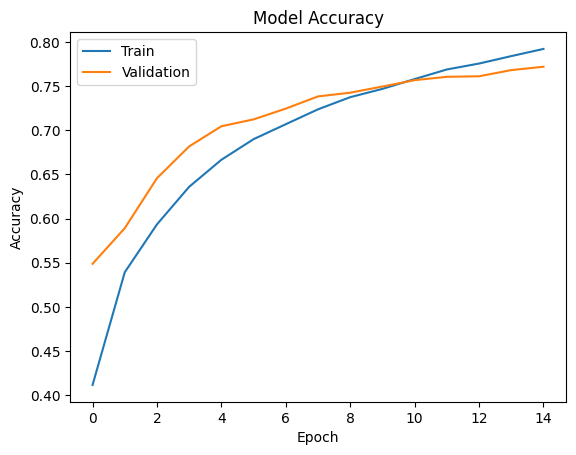

In [29]:
# Plot training accuracy.
plt.plot(history_3.history['accuracy'])
# Plot validation accuracy.
plt.plot(history_3.history['val_accuracy'])
# Set plot title.
plt.title('Model Accuracy')
# Set y label.
plt.ylabel('Accuracy')
# Set x label.
plt.xlabel('Epoch')
# Set legend.
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot.
plt.show()

**🔬 Observations:**

- The third iteration of this model seems very promising now.
- **The validation accuracy has improved substantially** and the problem of **overfitting has been solved**. We can say that the **model is giving a generalized performance.**
- The above plot shows that **the validation accuracy is higher than the training accuracy**. There are a **few possible reasons** for this:
    - The **size of the validation set is not big enough**.
    - We may have **imbalanced data in the validation set**.
    - **High regularization**. If we use regularization methods such as L2, L1, or Dropout, while the model calculates training accuracy it uses a regularized model but when it calculates accuracy on the validation set, it processes the data through an unregularized model. Regularization introduces some noise in loss value during training, because of this the training accuracy decreases more than expected, but while evaluating the model, the model doesn't use regularization, and hence there's no noise, which is why the validation accuracy doesn't decrease.
    - **To overcome this, we can try reducing the regularization or increasing the size of the validation set**.

## **IV. Transfer Learning**

### **i. Libraries**

In [30]:
# Custom models
from tensorflow.keras import Model
# Pre-trained VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16

### **ii. VGG Model**

In [31]:
# Clear the backend.
backend.clear_session()
# Set the seed for Python's built-in random module. Ensure any random operations to behave the same each run.
random.seed(seed)
# Set the seed for NumPy's random number generator. Control randomness in NumPy operations.
np.random.seed(seed)
# Set the seed for TensorFlow's random number generator. Make TensorFlow operations reproducible.
tf.random.set_seed(seed)

Note that

- The **VGG16 model was originally trained on images of size 224 x 224**. The **TensorFlow application allows the minimum image size of 32x32** which is luckily the same as the image size in the CIFAR-10 dataset. If you want to use any other size, you can change the size of the input image.
- By specifying the **argument include_top=False argument**, we load a **network that doesn't include the classification layers at the top**, i.e., **we will use the VGG16 model only for feature extraction.**

In [32]:
# Build a VGG model.
vgg_model = VGG16(weights = 'imagenet', 
                  include_top = False, 
                  input_shape = (32, 32, 3), pooling = 'max'
                 )

In [33]:
# Check summary of the model.
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**🔬 Observations**

- The VGG16 model has **more than 14.7 M trainable parameters.**
- Here, **we will not train any of the layers from the VGG16 model**. We will use the pre-trained weights and biases.
- Also, we can take any layer's output from the VGG16 model as the input of our new model. Here, **we will take the output of the 3rd block of the VGG16 model as the input of our new model.**

### **iii. Transfer Learning**

In [34]:
# Build a transfer layer.
transfer_layer = vgg_model.get_layer('block3_pool')

In [35]:
# Freeze all layers in the pre-trained VGG model.
vgg_model.trainable = False

In [36]:
# Flatten the feature maps from the VGG model into a 1D vector.
x = Flatten()(transfer_layer.output)
# Add a fully connect layer with 256 neurons and ReLU activation.
x = Dense(256, activation = 'relu')(x)
# Add a fully connected layer with 128 neurons and ReLU activation.
x = Dense(128, activation = 'relu')(x)
# Dropout layer to reduce overfitting (drops 30% of neurons randomly during training).
x = Dropout(0.3)(x)
# Add another dense layer with 64 neurons and ReLU activation.
x = Dense(64, activation = 'relu')(x)
# Normalize activations to stabilize and speed up training.
x = BatchNormalization()(x)
# Output layer with 10 neurons (for 10 classes) using softmax for probability distribution.
pred = Dense(10, activation = 'softmax')(x)
# Initialize the model.
model_4 = Model(vgg_model.input, pred)

In [37]:
# Compile the model.
model_4.compile(
    loss = 'categorical_crossentropy', 
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005), 
    metrics = ['accuracy']
)

In [38]:
# Fit the model.
history_4 = model_4.fit(
    x_train_normalized, y_train_encoded, 
    epochs = 10, 
    batch_size = 250, 
    validation_split = 0.1, 
    verbose = 2
)

Epoch 1/10
180/180 - 91s - 504ms/step - accuracy: 0.5098 - loss: 1.4464 - val_accuracy: 0.6756 - val_loss: 0.9544
Epoch 2/10
180/180 - 90s - 502ms/step - accuracy: 0.6678 - loss: 0.9875 - val_accuracy: 0.7336 - val_loss: 0.8117
Epoch 3/10
180/180 - 89s - 493ms/step - accuracy: 0.7135 - loss: 0.8461 - val_accuracy: 0.7524 - val_loss: 0.7453
Epoch 4/10
180/180 - 88s - 488ms/step - accuracy: 0.7430 - loss: 0.7583 - val_accuracy: 0.7620 - val_loss: 0.6921
Epoch 5/10
180/180 - 89s - 495ms/step - accuracy: 0.7639 - loss: 0.6930 - val_accuracy: 0.7722 - val_loss: 0.6711
Epoch 6/10
180/180 - 90s - 501ms/step - accuracy: 0.7841 - loss: 0.6368 - val_accuracy: 0.7776 - val_loss: 0.6512
Epoch 7/10
180/180 - 89s - 496ms/step - accuracy: 0.7965 - loss: 0.5960 - val_accuracy: 0.7856 - val_loss: 0.6325
Epoch 8/10
180/180 - 88s - 492ms/step - accuracy: 0.8096 - loss: 0.5566 - val_accuracy: 0.7774 - val_loss: 0.6385
Epoch 9/10
180/180 - 88s - 487ms/step - accuracy: 0.8226 - loss: 0.5208 - val_accuracy: 

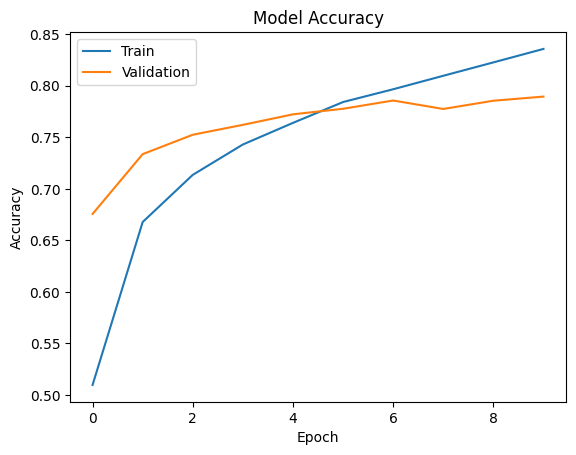

In [39]:
# Plot training accuracy.
plt.plot(history_4.history['accuracy'])
# Plot validation accuracy.
plt.plot(history_4.history['val_accuracy'])
# Set plot title.
plt.title('Model Accuracy')
# Set y label.
plt.ylabel('Accuracy')
# Set x label.
plt.xlabel('Epoch')
# Set legend.
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot.
plt.show()

**🔬 Observations:**

- The model **training accuracy is slightly higher than the validation accuracy**.
- The **validation accuracy has improved in comparison to the previous model**.
- We have been able to achieve the **best validation accuracy so far without actually training any of the convolutional layers.** There are other pre-trained models which can be tried and/or tuned to get better performance.

## **V. Predictions**

### **i. Libraries**

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


### **ii. Predictions**

In [41]:
# Make predictions on the test data.
y_pred_test = model_4.predict(x_test_normalized)
# Convert probabilities to class labels.
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)
# Calculate the probability of the predicted class.
y_pred_test_max_probas = np.max(y_pred_test, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.85      0.89      0.87      1000
           2       0.75      0.67      0.71      1000
           3       0.58      0.66      0.61      1000
           4       0.74      0.76      0.75      1000
           5       0.63      0.70      0.66      1000
           6       0.87      0.79      0.83      1000
           7       0.84      0.82      0.83      1000
           8       0.83      0.91      0.87      1000
           9       0.93      0.75      0.83      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



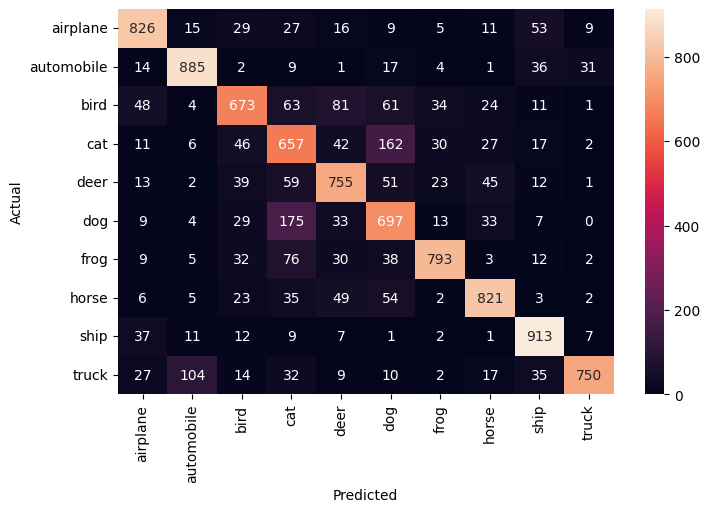

In [42]:
# Print the classification report.
print(classification_report(y_test, y_pred_test_classes))
# Plot the heatmap using confusion matrix.
cm = confusion_matrix(y_test, y_pred_test_classes)
# Set the figure.
plt.figure(figsize = (8, 5))
# Draw the heatmap.
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = cifar10_classes, yticklabels = cifar10_classes)
# Set y label.
plt.ylabel('Actual')
# Set x label.
plt.xlabel('Predicted')
# Show the plot.
plt.show()

**🔬 Observations:**

- The model is giving about **79% accuracy on the test data** which is **comparable to the accuracy of the validation data.** This implies that the model is giving a generalized performance.
- The **recall has a high range** which implies that the **model is good at identifying some objects while poor at identifying some other objects**. For example, the **model can identify more than 90% of ships but can identify only ~ 54% of cats**.
- The model is majorly **confused between cats and dogs**. This implies that the **model might be focused on features related to shapes and sizes but not deep features of objects** that can help to distinguish between objects like cats and dogs.
- Consequently, **precision also has a high range with the 'cat' class having the least precision.**
- The **highest precision is for 'automobile'** which implies that the model can distinguish automobiles from other objects.

### **iii. Predicted Image Visualization**

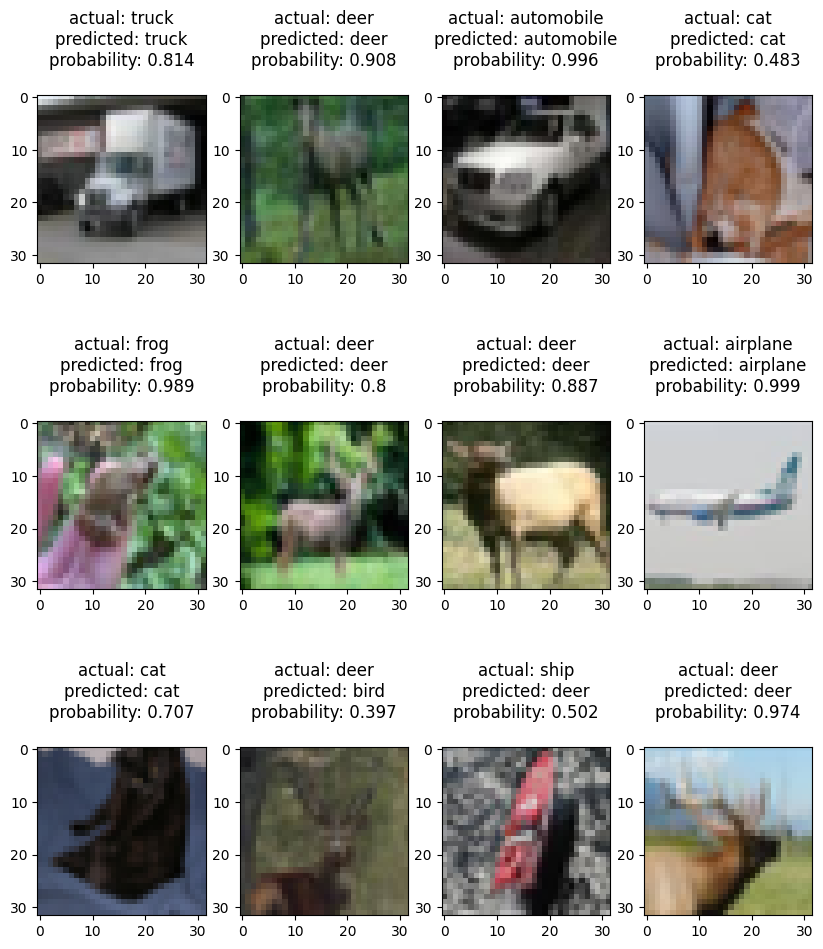

In [43]:
# Declare the number of rows.
rows = 3
# Declare the number of columns.
cols = 4
# Set the figure.
fig = plt.figure(figsize = (10, 12))
# Iterate each column.
for i in range(cols):
    # Iterate each row.
    for j in range(rows):
        # Randomly choose an image index.
        random_index = np.random.randint(0, len(y_test))
        # Add a subplot at the current grid position.
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        # Display the selected image.
        ax.imshow(x_test[random_index, :])
        # Retrieve the predicted class label for the selected image.
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        # Retrieve the maximum predicted probability for that prediction.
        pred_proba = y_pred_test_max_probas[random_index]
        # Retrieve the true class label for comparison.
        true_label = cifar10_classes[y_test[random_index, 0]]
        # Set the subplot title to the image's class label.
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(true_label, pred_label, pred_proba))

# Render and display all the subplots with images and titles.
plt.show()

## **VI. Conclusion**

In this notebook, **we have implemented a CNN model from scratch and used transfer learning to make predictions on the CIFAR-10 dataset.** We have learned how to prepare the image data before passing it into the CNN model and how to add layers sequentially inside the model.

We have seen four different iterations of the CNN model and built an intuition about how to improve the model by tuning various hyperparameters and using different techniques. There is still plenty of scope for improvement and you can try out tuning different hyperparameters to improve the model performance.